In [165]:
import numpy as np
from numpy import genfromtxt

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from qiskit.tools.jupyter import *
from scipy.optimize import minimize
import matplotlib as mpl
import matplotlib.pylab as pylab
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings

warnings.filterwarnings('ignore')

pi = np.pi
cos = np.cos
sin = np.sin
exp = np.exp
sqrt = np.sqrt

In [166]:
anharmonicity = 4581552617.648945 - 4.92517 * 1e9

In [167]:
NUM_DATA = 95
param = genfromtxt('find_phase_exp.csv', delimiter=",")
exp_data = genfromtxt('exp_data.csv', delimiter=",")[3:]

In [168]:
for theta in param:
    print(theta)

[3.91888329 0.03403396 6.0370559 ]
[1.5109066  0.62337626 2.06321865]
[6.05653657 4.89386627 3.43197177]
[0.17919457 2.49710906 4.38431256]
[3.20926878 3.20982402 5.23457955]
[0.34225085 0.94326611 5.20497559]
[2.34651654 3.95431389 3.05087517]
[1.4888863  0.79867661 0.56599537]
[2.57968474 4.45072969 0.97783279]
[3.68835056 1.18921785 4.02256947]
[3.71766088 4.23369495 4.82063136]
[5.27495204 1.72928872 5.66006704]
[0.15497756 0.51501466 6.03680898]
[1.75822285 2.20694101 3.13027852]
[0.39625713 4.39552955 5.23311667]
[3.08154406 1.76892843 2.57153954]
[3.38571915 4.50528543 4.24891738]
[2.35979064 0.75925089 2.5393576 ]
[1.12192408 5.97310756 1.36702269]
[4.63096649 1.12355499 0.21186329]
[2.37583492 4.67068495 0.77554916]
[4.29836803 5.91580966 5.20803008]
[4.54173195 4.28794418 2.67756696]
[2.14018646 2.67219003 1.07983617]
[1.27885162 1.74993502 2.87428942]
[3.26051878 0.58713072 0.22939062]
[3.83918419 1.66607345 3.12063265]
[4.05809782 2.34504535 1.58066794]
[1.14599239 5.217617

In [169]:
exp_data[1, 0]

0.03145

In [170]:
def Z01(phi):
    return np.array([[exp(1j * phi), 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]])


def Z12(phi):
    return np.array([[1, 0, 0],
                     [0, 1, 0],
                     [0, 0, exp(1j * phi)]])


def X01(theta):
    return np.array([[np.cos(theta / 2), -1j * np.sin(theta / 2), 0],
                     [-1j * np.sin(theta / 2), np.cos(theta / 2), 0],
                     [0, 0, 1]])


def X12(theta):
    return np.array([[1, 0, 0],
                     [0, np.cos(theta / 2), -1j * np.sin(theta / 2)],
                     [0, -1j * np.sin(theta / 2), np.cos(theta / 2)]])

def model_population(theta, alpha):
    # alpha are parameters of the model
    psi_init = [[1], [0], [0]]
    psi_final = Z12(alpha[0]) @ X01(theta[2]) @ Z12(alpha[0]) @ X01(theta[1]) @ Z12(alpha[0]) @ X01(theta[0]) @ Z01(
        alpha[1]) @ X12(pi / 2) @ Z12(alpha[0]) @ X01(pi / 2) @ psi_init
    return [np.absolute(psi_final[0][0]) ** 2, np.absolute(psi_final[1][0]) ** 2, np.absolute(psi_final[2][0]) ** 2]


def obj_func(alpha):
    theo_data = [model_population(theta, alpha) for theta in param]
    L = 0
    for i in range(NUM_DATA):
        L += (exp_data[i, 0] - theo_data[i][0]) ** 2 + (exp_data[i, 1] - theo_data[i][1]) ** 2 + (
                    exp_data[i, 2] - theo_data[i][2]) ** 2
    return L

In [171]:
NUM_OPTIMIZER = 10
err = 100
optimized_alpha = []
for i in range(NUM_OPTIMIZER):
    alpha_init = [pi * np.random.randint(-100, 100) / 100 for j in range(2)]
    result = minimize(obj_func, alpha_init)
    if result.fun < err:
        err = result.fun
        optimized_alpha = result.x
print('error = ', err)
print('alpha = ', optimized_alpha)

error =  0.3224360939119659
alpha =  [ 2.858849   -2.56750437]


In [172]:
theo_data = [model_population(theta, optimized_alpha) for theta in param]

In [191]:
p0t = [arr[0] for arr in theo_data]
p1t = [arr[1] for arr in theo_data]
p2t = [arr[2] for arr in theo_data]
p0 = [exp_data[:, 0][i] for i in range(NUM_DATA)]
p1 = [exp_data[:, 1][i] for i in range(NUM_DATA)]
p2 = [exp_data[:, 2][i] for i in range(NUM_DATA)]

In [188]:
### Start from electron
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (9, 9),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
colors=sns.color_palette("rocket",3)
seshadri = ['#c3121e', '#0348a1', '#ffb01c', '#027608', '#0193b0', '#9c5300', '#949c01', '#7104b5']
#            0sangre,   1neptune,  2pumpkin,  3clover,   4denim,    5cocoa,    6cumin,    7berry

Text(0, 0.5, '$P_{0_{exp}}$')

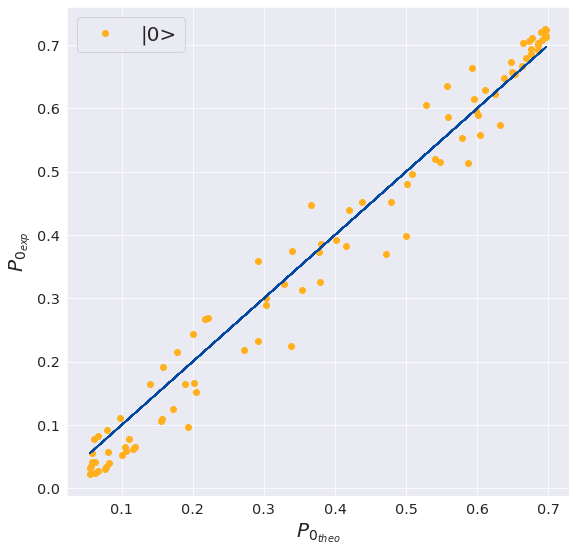

In [189]:
plt.plot(p0t,p0, 'o', c=seshadri[2],label='|0>')
plt.plot(p0t,p0t, 'k', c=seshadri[1])
plt.legend(fontsize=20)
plt.xlabel(r'$P_{0_{theo}}$',fontsize=20)
plt.ylabel(r'$P_{0_{exp}}$',fontsize=20)

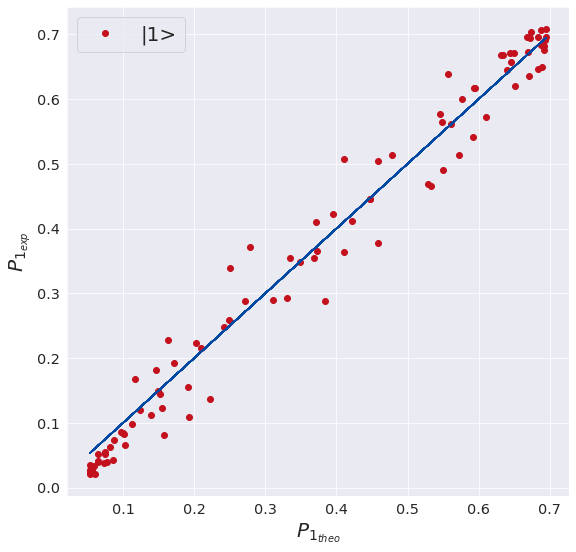

In [192]:
plt.plot(p1t,p1, 'o', c=seshadri[0],label='|1>')
plt.plot(p1t,p1t, 'k', c=seshadri[1])
plt.legend(fontsize=20)
plt.xlabel(r'$P_{1_{theo}}$',fontsize=20)
plt.ylabel(r'$P_{1_{exp}}$',fontsize=20)
plt.show()

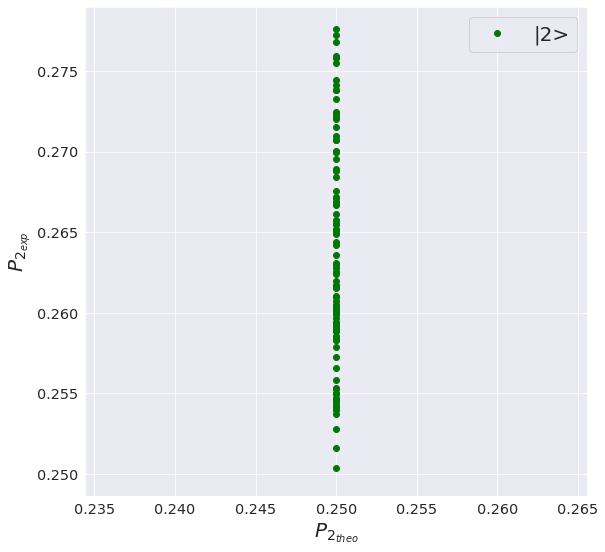

In [193]:
plt.plot(p2t,p2, 'o', c=seshadri[3],label='|2>')
plt.plot(p2t,p2t,  c=seshadri[1])
plt.legend(fontsize=20)
plt.xlabel(r'$P_{2_{theo}}$',fontsize=20)
plt.ylabel(r'$P_{2_{exp}}$',fontsize=20)
plt.axis('equal')
plt.show()